# Import

In [1]:
import numpy as np
import pandas as pd
from numpy import array
from numpy import hstack
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

from keras.models import Sequential
from keras.layers import Dense, LSTM
from keras.utils import np_utils

# Read data

In [2]:
df_01 = pd.read_excel('./data/data_past_time_2020_01.xls', sheet_name='Sheet1', header=[0,1])

In [3]:
df_01

,날짜,PM10,PM2.5,오 존,이산화질소,일산화탄소,아황산가스
,(월-일-시),(㎍/㎥),(㎍/㎥),(ppm),(ppm),(ppm),(ppm)
0,01-01-01,24.0,19.0,0.002,0.036,0.5,0.003
1,01-01-02,25.0,21.0,0.001,0.039,0.6,0.003
2,01-01-03,29.0,23.0,0.001,0.037,0.9,0.003
3,01-01-04,26.0,22.0,0.001,0.036,0.6,0.002
4,01-01-05,25.0,19.0,0.001,0.035,0.6,0.002
...,...,...,...,...,...,...,...
739,01-31-20,43.0,36.0,0.016,0.035,0.6,0.003
740,01-31-21,44.0,37.0,0.017,0.033,0.6,0.003
741,01-31-22,42.0,35.0,0.024,0.025,0.5,0.003


In [4]:
df_02 = pd.read_excel('./data/data_past_time_2020_02.xls', sheet_name='Sheet1', header=[0,1])
df_03 = pd.read_excel('./data/data_past_time_2020_03.xls', sheet_name='Sheet1', header=[0,1])

In [5]:
df_01_03 = pd.concat([df_01, df_02, df_03], ignore_index=True)

In [6]:
df_pm25 = df_01_03[['날짜', 'PM2.5']]

In [7]:
df_pm25

,날짜,PM2.5
,(월-일-시),(㎍/㎥)
0,01-01-01,19.0
1,01-01-02,21.0
2,01-01-03,23.0
3,01-01-04,22.0
4,01-01-05,19.0
...,...,...
2179,03-31-20,22.0
2180,03-31-21,23.0
2181,03-31-22,22.0


In [8]:
df_pm25.isnull().sum()

날짜     (월-일-시)     0
PM2.5  (㎍/㎥)      12
dtype: int64

In [9]:
df_pm25.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2184 entries, 0 to 2183
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   (날짜, (월-일-시))   2184 non-null   object 
 1   (PM2.5, (㎍/㎥))  2172 non-null   float64
dtypes: float64(1), object(1)
memory usage: 34.2+ KB


In [10]:
df_pm25 = df_pm25.fillna(method='ffill')

In [11]:
df_pm25.isnull().sum()

날짜     (월-일-시)    0
PM2.5  (㎍/㎥)      0
dtype: int64

In [12]:
df_pm25.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2184 entries, 0 to 2183
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   (날짜, (월-일-시))   2184 non-null   object 
 1   (PM2.5, (㎍/㎥))  2184 non-null   float64
dtypes: float64(1), object(1)
memory usage: 34.2+ KB


In [13]:
pm25_seq = array(df_pm25['PM2.5'])

In [14]:
len(pm25_seq)

2184

In [15]:
n_steps = 5
n_features = 1

In [16]:
def split_sequence(sequence, n_steps):
    X, y = list(), list()
    for i in range(len(sequence)):
        # find the end of this pattern
        end_ix = i + n_steps
        # check if we are beyond the sequence
        if end_ix > len(sequence)-1:
            break
        # gather input and output parts of the pattern
        seq_x, seq_y = sequence[i:end_ix], sequence[end_ix]
        X.append(seq_x)
        y.append(seq_y)
    return array(X), array(y)

In [17]:
# split into samples
X_pm25, y_pm25 = split_sequence(pm25_seq, n_steps)

In [18]:
X_pm25.shape

(2179, 5, 1)

In [19]:
X_pm25 = X_pm25.reshape((X_pm25.shape[0], X_pm25.shape[1], n_features))

In [20]:
X_pm25

array([[[19.],
        [21.],
        [23.],
        [22.],
        [19.]],

       [[21.],
        [23.],
        [22.],
        [19.],
        [19.]],

       [[23.],
        [22.],
        [19.],
        [19.],
        [18.]],

       ...,

       [[35.],
        [29.],
        [24.],
        [22.],
        [23.]],

       [[29.],
        [24.],
        [22.],
        [23.],
        [22.]],

       [[24.],
        [22.],
        [23.],
        [22.],
        [24.]]])

In [21]:
y_pm25

array([[19.],
       [18.],
       [21.],
       ...,
       [22.],
       [24.],
       [24.]])

In [22]:
y_pm25.shape

(2179, 1)

# RNN-LSTM

## Vanilla LSTM

In [23]:
model = Sequential()
model.add(LSTM(100, activation='relu', input_shape=(n_steps, n_features)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')
hist = model.fit(X_pm25, y_pm25, epochs=10, batch_size=10, verbose=1)

Epoch 1/10
218/218 [==============================] - 4s 13ms/step - loss: 235.5359
Epoch 2/10
218/218 [==============================] - 3s 13ms/step - loss: 31.9737
Epoch 3/10
218/218 [==============================] - 3s 13ms/step - loss: 24.4463
Epoch 4/10
218/218 [==============================] - 3s 13ms/step - loss: 24.1284
Epoch 5/10
218/218 [==============================] - 3s 13ms/step - loss: 23.4864
Epoch 6/10
218/218 [==============================] - 3s 13ms/step - loss: 23.6044
Epoch 7/10
218/218 [==============================] - 3s 14ms/step - loss: 26.3350
Epoch 8/10
218/218 [==============================] - 3s 14ms/step - loss: 22.4818
Epoch 9/10
218/218 [==============================] - 3s 14ms/step - loss: 25.3149
Epoch 10/10
218/218 [==============================] - 3s 13ms/step - loss: 21.8790


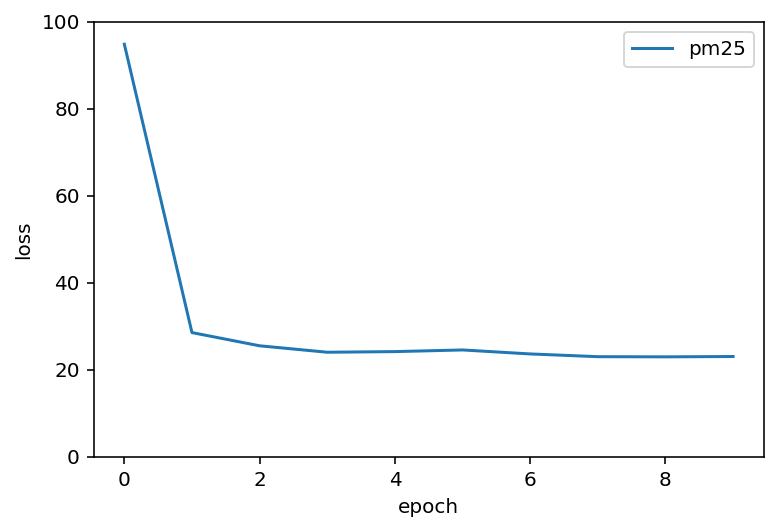

In [24]:
plt.plot(hist.history['loss'])
plt.ylim(0.0, 100.0)
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['pm25'], loc='upper right')
plt.show()

## ConvLSTM

In [ ]:
# univariate convlstm
from numpy import array
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import ConvLSTM2D

# choose a number of time steps
n_steps = 4
# reshape from [samples, timesteps] into [samples, timesteps, rows, columns, features]
n_features = 1
n_seq = 2
n_steps = 2
X = X.reshape((X.shape[0], n_seq, 1, n_steps, n_features))
# define model
model = Sequential()
model.add(ConvLSTM2D(filters=64, kernel_size=(1,2), activation='relu', input_shape=(n_seq, 1, n_steps, n_features)))
model.add(Flatten())
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')
# fit model
model.fit(X, y, epochs=500, verbose=0)

X_pm25 = X_pm25.reshape((X_pm25.shape[0], X_pm25.shape[1], n_features))

# Forecast PM2.5

In [25]:
april_pm25 = pd.read_excel('./data/data_past_time_2020_04.xls', sheet_name='Sheet1', header=[0,1])

In [26]:
df_april_pm25 = april_pm25[['날짜', 'PM2.5']]

In [27]:
df_april_pm25.isnull().sum()

날짜     (월-일-시)    0
PM2.5  (㎍/㎥)      6
dtype: int64

In [28]:
df_april_pm25 = df_april_pm25.fillna(method='ffill')

In [29]:
df_april_pm25.isnull().sum()

날짜     (월-일-시)    0
PM2.5  (㎍/㎥)      0
dtype: int64

In [30]:
april_pm25_seq = array(df_april_pm25["PM2.5"])

In [31]:
X_april_pm25, y_april_pm25 = split_sequence(april_pm25_seq, n_steps)

In [32]:
X_april_pm25[:20]

array([[[24.],
        [26.],
        [34.],
        [45.],
        [43.]],

       [[26.],
        [34.],
        [45.],
        [43.],
        [44.]],

       [[34.],
        [45.],
        [43.],
        [44.],
        [47.]],

       [[45.],
        [43.],
        [44.],
        [47.],
        [43.]],

       [[43.],
        [44.],
        [47.],
        [43.],
        [44.]],

       [[44.],
        [47.],
        [43.],
        [44.],
        [41.]],

       [[47.],
        [43.],
        [44.],
        [41.],
        [43.]],

       [[43.],
        [44.],
        [41.],
        [43.],
        [44.]],

       [[44.],
        [41.],
        [43.],
        [44.],
        [48.]],

       [[41.],
        [43.],
        [44.],
        [48.],
        [52.]],

       [[43.],
        [44.],
        [48.],
        [52.],
        [50.]],

       [[44.],
        [48.],
        [52.],
        [50.],
        [27.]],

       [[48.],
        [52.],
        [50.],
        [27.],
        [18.]],


In [33]:
y_april_pm25[:20]

array([[44.],
       [47.],
       [43.],
       [44.],
       [41.],
       [43.],
       [44.],
       [48.],
       [52.],
       [50.],
       [27.],
       [18.],
       [13.],
       [13.],
       [20.],
       [25.],
       [19.],
       [19.],
       [19.],
       [21.]])

In [34]:
X_april_pm25 = X_april_pm25.reshape((X_april_pm25.shape[0], X_april_pm25.shape[1], n_features))

In [35]:
y_april_forecast = model.predict(X_april_pm25)

In [50]:
y_april_forecast

array([[42.49416  ],
       [44.325787 ],
       [48.074802 ],
       [43.14494  ],
       [44.957935 ],
       [41.736423 ],
       [44.141853 ],
       [45.050358 ],
       [49.0947   ],
       [52.690567 ],
       [49.713303 ],
       [25.405064 ],
       [21.45017  ],
       [15.816807 ],
       [14.656076 ],
       [21.166311 ],
       [26.152584 ],
       [19.544006 ],
       [19.824713 ],
       [20.327047 ],
       [22.13445  ],
       [18.970743 ],
       [19.091808 ],
       [19.153406 ],
       [20.038134 ],
       [23.98749  ],
       [29.156694 ],
       [27.802235 ],
       [33.07085  ],
       [26.696009 ],
       [34.335747 ],
       [38.438633 ],
       [46.023476 ],
       [47.22883  ],
       [38.12218  ],
       [28.679075 ],
       [31.183556 ],
       [31.567783 ],
       [31.191437 ],
       [29.092762 ],
       [29.33825  ],
       [24.165115 ],
       [25.556448 ],
       [22.3058   ],
       [26.376347 ],
       [22.039633 ],
       [22.20951  ],
       [24.33

In [36]:
mdh = np.arange(0, len(april_pm25_seq) + 1, 100)

In [40]:
dates = april_pm25[['날짜']]

In [44]:
dates = array(dates)

In [45]:
month_day_hour = dates[mdh]

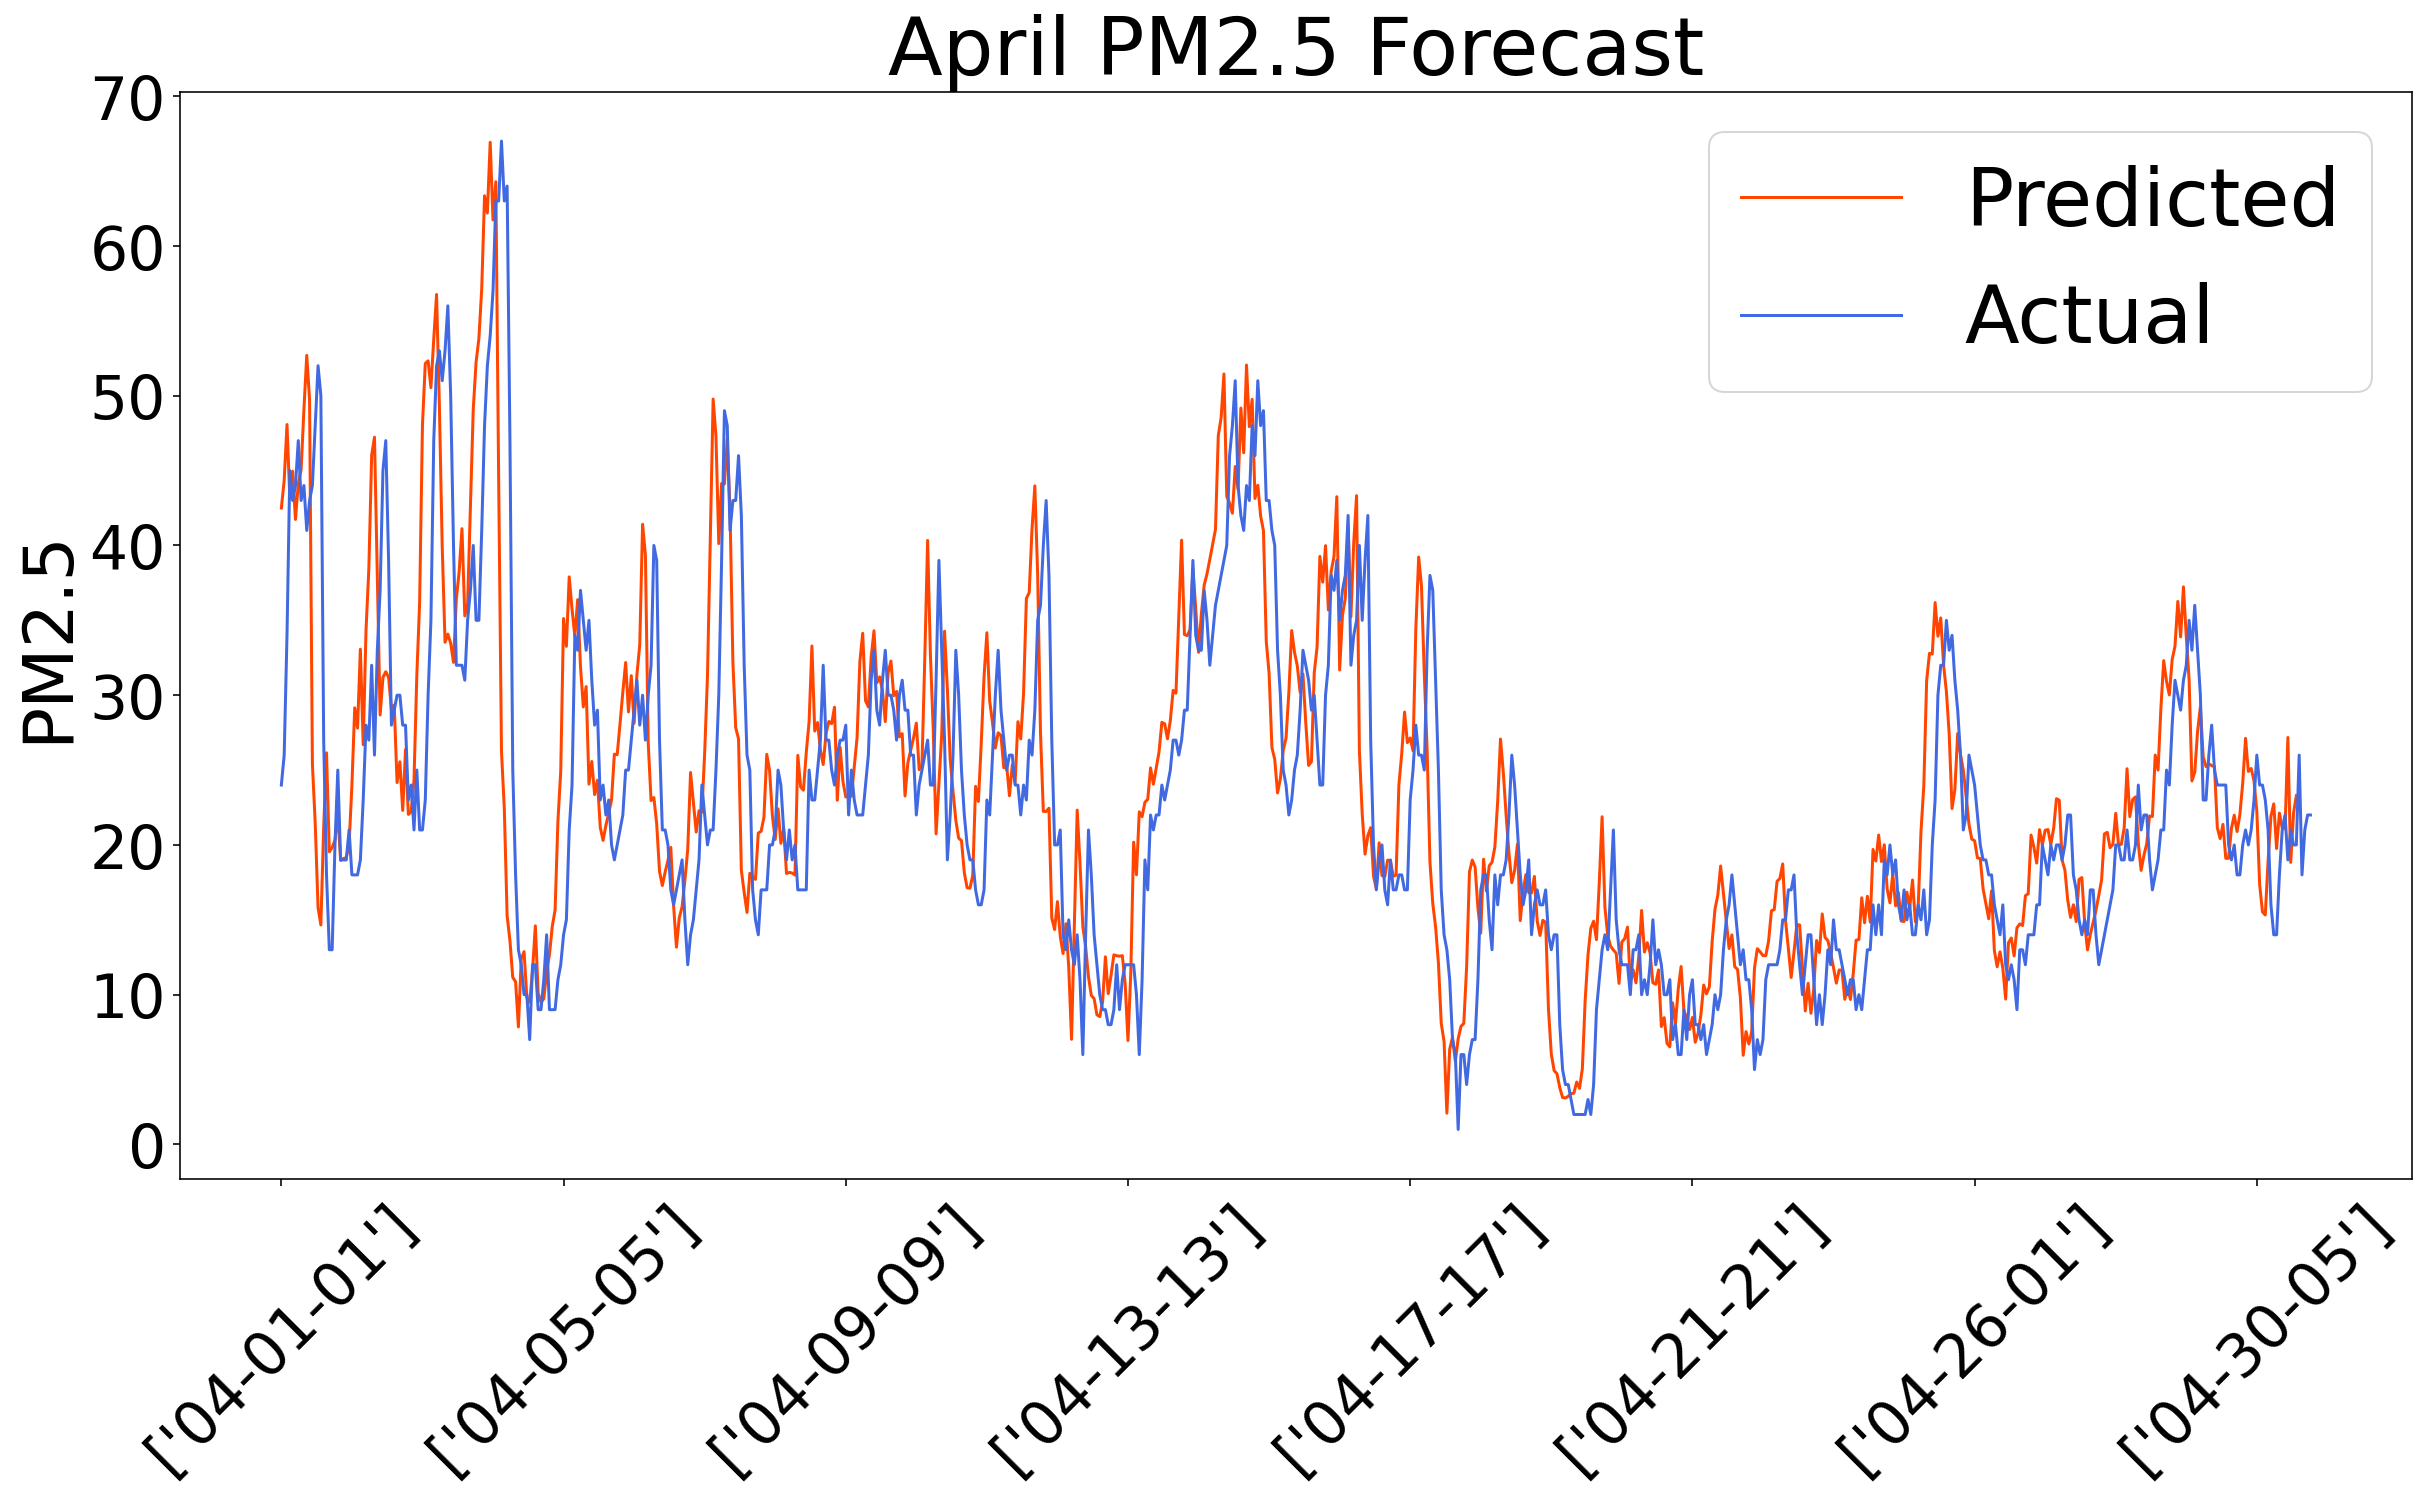

In [46]:
plt.figure(figsize=(20,10))
plt.plot(y_april_forecast, '#FF4500')
plt.plot(april_pm25_seq, '#4169E1')
plt.legend(['Predicted', 'Actual'], loc='upper right', fontsize=40)
#path = 'C:/Windows/Fonts/NanumGothicBold.ttf'
#fontprop = fm.FontProperties(fname=path, size=40)

plt.title('April PM2.5 Forecast', fontsize=40) # fontproperties=fontprop
plt.xticks(mdh, month_day_hour, fontsize = 30, rotation = 45)
plt.yticks(fontsize = 30)
plt.ylabel('PM2.5', fontsize = 35)
plt.show()

In [47]:
from sklearn.metrics import mean_squared_error
from math import sqrt

y_rmse = sqrt(mean_squared_error(y_april_forecast, y_april_pm25))
print(y_rmse)

3.5829074549854614


In [48]:
scores = model.evaluate(X_pm25, y_pm25, batch_size=1)
print(scores)

2179/2179 [==============================] - 5s 2ms/step - loss: 22.0440
22.04402732849121


In [49]:
model.save(f'models/pm25/1')

INFO:tensorflow:Assets written to: models/pm25/1\assets
